In [17]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deep_hvac import ppo, runner, util

In [64]:
expert = pd.read_pickle('../data/results-expert.pickle')

In [2]:
env = runner.make_default_env(expert_performance='../data/results-expert.pickle')
env_name = 'DefaultBuilding-v0'

2022-04-23 15:44:16,118 - deep_hvac - DEBUG - Creating default environment DefaultBuilding-v0.
2022-04-23 15:44:16,120 - deep_hvac - DEBUG - Loading NSRDB data...
2022-04-23 15:44:16,438 - deep_hvac - DEBUG - Finished loading NSRDB data.
2022-04-23 15:44:16,438 - deep_hvac - DEBUG - Loading Houston price data...
2022-04-23 15:44:16,443 - deep_hvac - DEBUG - Finished loading price data.


[INFO][2022-04-23 15:44:16]: Creating 1 environments.
/home/oski/.virtualenvs/6484-proj/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/oski/.virtualenvs/6484-proj/lib/python3.8/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(
/home/oski/.virtualenvs/6484-proj/lib/python3.8/site-packages/easyrl/envs/dummy_vec_env.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.bu

In [4]:
agent = ppo.load_agent('../data/DefaultBuilding-v0/seed_0/model/model_best.pt',
                       env_name)

[INFO][2022-04-23 15:44:29]: Creating 1 environments.
[INFO][2022-04-23 15:44:29]: Alogrithm type:<class 'easyrl.configs.ppo_config.PPOConfig'>
[INFO][2022-04-23 15:44:29]: Loading model from ../data/DefaultBuilding-v0/seed_0/model/model_best.pt


In [78]:
def results_to_dataframes(results_dict):
    out = {}
    for k, v in results_dict.items():
        if k == 'timestamp':
            out[k] = v[0]
            continue
        out[k] = pd.DataFrame(
            np.array(v).T,
            index=results_dict['timestamp'][0]
        )
    return out

In [79]:
jan1 = dt.datetime(2018, 1, 1, 0, 0)
monthly_results = {}
for month in range(12):
    start = dt.datetime(2018, month + 1, 1, 0, 0)
    start_int = int((start - jan1).total_seconds() / 3600)
    results = runner.get_results(agent, env, time=0,
                                 max_steps=24*30*2)
    monthly_results[month + 1] = results_to_dataframes(results)

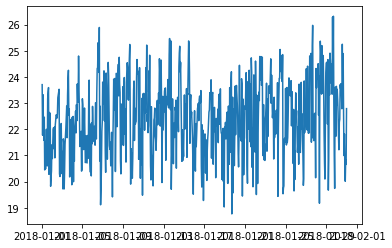

In [101]:
def plot_month(month, monthlies):
    data = monthlies[month]
    timestamps = data['timestamp']
    plt.plot(timestamps, data['t_inside'].mean(axis=1).values)

plot_month(8, monthly_results)

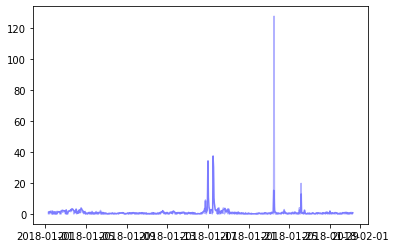

In [60]:
inside = monthly_results[8]['electricity_cost']
timestamps = monthly_results[8]['timestamp'][0]
plt.plot(timestamps.values, inside.values, alpha=0.3, color='b')

In [83]:
monthly_results[1]['electricity_cost'].sum(axis=0).mean()

702.9217024874197

In [67]:
sum(expert['electricity_cost'])

1935.8464198121017

In [88]:
pd.DataFrame(expert)

ValueError: All arrays must be of the same length

In [90]:
for k, v in expert.items():
    print(k, len(v))

heating_demand 8758
heating_sys_electricity 8758
cooling_demand 8758
cooling_sys_electricity 8758
electricity_out 8758
t_air 8758
t_inside 8758
t_bulk 8758
timestamp 8758
t_outside 8758
solar_gain 8758
electricity_price 8758
electricity_consumed 8758
electricity_cost 8760
reward 8758
set_heating 8758
set_cooling 8758
expert_performance 8760


In [103]:
[0, 1, 2, 3][1:-1]

[1, 2]